# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

cld = []
cty = []
dte = []
hum = []
log = []
lat = []
mxs = []
win = []
city_name = []
num = 0
set_data = 1

print(f"Beginning Data Retrieval")

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        num += 1
        print(f"Processing Record {num} of Set {set_data} | {city}")
        city_name.append(response["name"])
        cld.append(response["clouds"]["all"])
        cty.append(response["sys"]["country"])
        dte.append(response["dt"])
        hum.append(response["main"]["humidity"])
        log.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxs.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"]) 
 
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    if num == 50: 
        set_data += 1
        num = 0
print(f"------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | halifax
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | pathein
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | luanda
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | darhan
Processing Record 15 of Set 1 | nizhniy odes
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | samana
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bud
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of 

Processing Record 37 of Set 4 | mahajanga
Processing Record 38 of Set 4 | fort nelson
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | toyooka
Processing Record 42 of Set 4 | tabou
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | bontang
Processing Record 45 of Set 4 | clarence town
Processing Record 46 of Set 4 | gumushane
City not found. Skipping...
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | edson
Processing Record 49 of Set 4 | akureyri
Processing Record 50 of Set 4 | kalmunai
Processing Record 1 of Set 5 | gizo
Processing Record 2 of Set 5 | menongue
Processing Record 3 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | sojitra
Processing Record 7 of Set 5 | shakawe
Processing Record 8 of Set 5 | vestmannaeyjar
Processing Record 9 of Set 5 | aykhal
Pro

Processing Record 30 of Set 8 | nanakuli
Processing Record 31 of Set 8 | russell
Processing Record 32 of Set 8 | evensk
Processing Record 33 of Set 8 | krasni okny
Processing Record 34 of Set 8 | sheregesh
Processing Record 35 of Set 8 | yauya
Processing Record 36 of Set 8 | baykit
Processing Record 37 of Set 8 | oranjestad
Processing Record 38 of Set 8 | quelimane
Processing Record 39 of Set 8 | upington
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | mazamari
Processing Record 43 of Set 8 | sola
Processing Record 44 of Set 8 | panama city
Processing Record 45 of Set 8 | saint george
Processing Record 46 of Set 8 | hambantota
Processing Record 47 of Set 8 | mehamn
Processing Record 48 of Set 8 | mahibadhoo
Processing Record 49 of Set 8 | aflu
City not found. Skipping...
Processing Record 50 of Set 8 | acazulco
Processing Record 1 of Set 9 | krasnoselkup
Processing Record 2 of Set 9 | noyabrsk
Pr

Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | aklavik
Processing Record 19 of Set 12 | evanston
Processing Record 20 of Set 12 | sur
Processing Record 21 of Set 12 | langarud
Processing Record 22 of Set 12 | braganca
Processing Record 23 of Set 12 | ternate
Processing Record 24 of Set 12 | san jose
Processing Record 25 of Set 12 | anori
Processing Record 26 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 27 of Set 12 | zigong
Processing Record 28 of Set 12 | dwarka
Processing Record 29 of Set 12 | ponta do sol
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | puerto suarez
Processing Record 32 of Set 12 | trorod
Processing Record 33 of Set 12 | cazaje
City not found. Skipping...
Processing Record 34 of Set 12 | pauini
Processing Record 35 of Set 12 | bengkulu
Processing Record 36 of Set 12 | henderson
Processing Record 37 of Set 12 | bhadrachalam
Processing Record 38 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Display the DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Latitude": lat,
                        "Longitude": log,
                        "Max Temp": mxs,
                        "Humidity": hum,
                        "Cloudiness": cld,
                        "Wind Speed": win,
                        "Country": cty,
                        "Date": dte})
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,47.23,59,88,2.91,GL,1594592385
1,Halifax,44.65,-63.57,73.00,77,9,3.00,CA,1594592822
2,Thompson,55.74,-97.86,75.20,50,75,9.17,CA,1594592394
3,New Norfolk,-42.78,147.06,37.99,92,0,2.44,AU,1594592371
4,Pathein,16.78,94.73,79.38,87,100,6.38,MM,1594592916


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# NOTE: No cities over 100% humidity (skipping)
city_df.max()["Humidity"]

100

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


In [9]:
#Export ther city data into a .csv
city_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)
city_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,47.23,59,88,2.91,GL,1594592385
1,Halifax,44.65,-63.57,73.00,77,9,3.00,CA,1594592822
2,Thompson,55.74,-97.86,75.20,50,75,9.17,CA,1594592394
3,New Norfolk,-42.78,147.06,37.99,92,0,2.44,AU,1594592371
4,Pathein,16.78,94.73,79.38,87,100,6.38,MM,1594592916


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

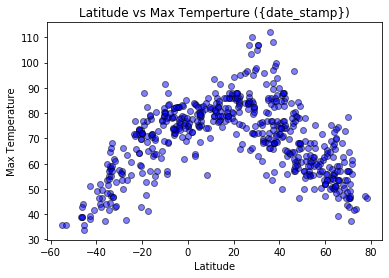

In [10]:

# time = time.gmtime(city_df["Date"][8])
# date_stamp = time.strftime("%x", time)

plt.scatter(city_df["Latitude"],city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperture ({date_stamp})")
plt.savefig("../output_data//fig1.png")
plt.show()

## Latitude vs. Humidity Plot

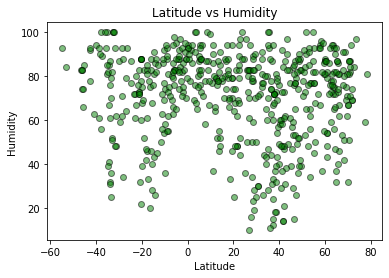

In [11]:
plt.scatter(city_df["Latitude"],city_df["Humidity"], marker="o", facecolors="green", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data//fig2.png")
plt.show()


## Latitude vs. Cloudiness Plot

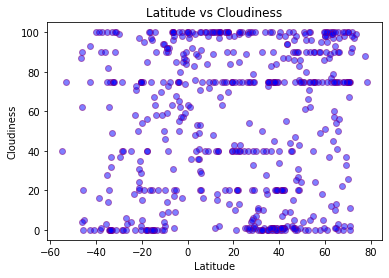

In [12]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="purple",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.savefig("../output_data//fig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

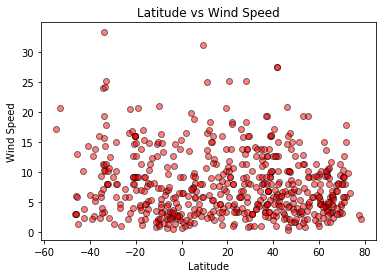

In [13]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig("../output_data//fig4.png")
plt.show()


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
city_weather_load = "../output_data/cities.csv"
city_weather_df = pd.read_csv(city_weather_load)
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,47.23,59,88,2.91,GL,1594592385
1,Halifax,44.65,-63.57,73.00,77,9,3.00,CA,1594592822
2,Thompson,55.74,-97.86,75.20,50,75,9.17,CA,1594592394
3,New Norfolk,-42.78,147.06,37.99,92,0,2.44,AU,1594592371
4,Pathein,16.78,94.73,79.38,87,100,6.38,MM,1594592916


In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
north_hem.reset_index(inplace=True)

south_hem = city_weather_df.loc[city_weather_df["Latitude"] < 0]
south_hem.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4270751206657296


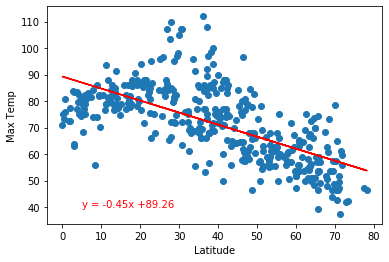

In [17]:
x_value = north_hem["Latitude"]
y_value = north_hem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6694730015895881


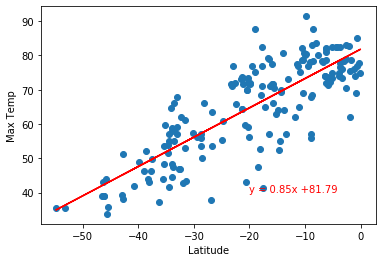

In [18]:
x_value = south_hem["Latitude"]
y_value = south_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-20,40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005068273627862925


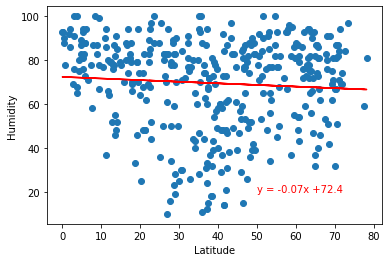

In [19]:
x_value = north_hem["Latitude"]
y_value = north_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0030576952403245684


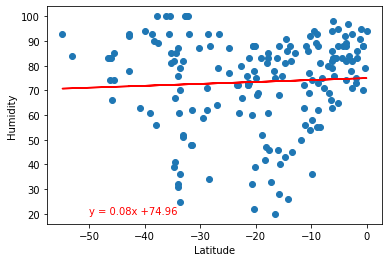

In [20]:
x_value = south_hem["Latitude"]
y_value = south_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002612941139553744


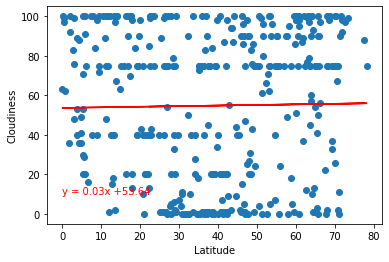

In [21]:
x_value = north_hem["Latitude"]
y_value = north_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(0, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.048942569503079174


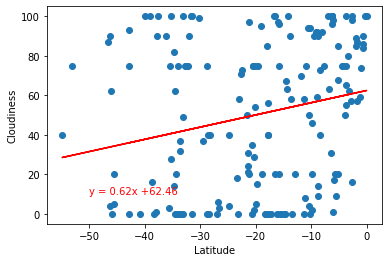

In [22]:
x_value = south_hem["Latitude"]
y_value = south_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01202111220530283


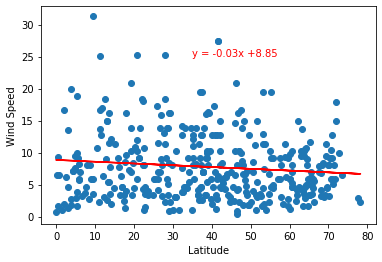

In [23]:
x_value = north_hem["Latitude"]
y_value = north_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(35, 25),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.062036527850510476


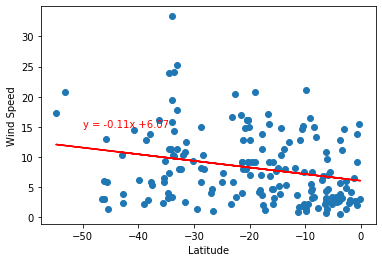

In [24]:
x_value = south_hem["Latitude"]
y_value = south_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 15),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//fig12.png")
plt.show()